In [2]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import skew

In [3]:
df=pd.read_excel("DS1_C4_S5_Car_Data_Challenge.xlsx")
df

,Sl. No.,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Engine_Location,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,0,Tata,Nano Genx,Xt,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tata,Nano Genx,Emax Xm,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Tata,Nano Genx,Xta,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Tata,Nano Genx,Xm,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,1271,Honda,City,Vx Mt Diesel,1498.0,4.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",...,Yes,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1272,1272,Honda,City,Zx Mt Diesel,1498.0,4.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",...,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1273,1273,Honda,City,Zx Cvt Petrol,1497.0,4.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",...,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1274,1274,Honda,City,V Cvt Petrol,1497.0,4.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",...,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN


In [3]:
sorted(list(df.columns))

['12v_Power_Outlet',
 '3_Point_Seat-Belt_in_Middle_Rear_Seat',
 'ABS_(Anti-lock_Braking_System)',
 'ARAI_Certified_Mileage',
 'ARAI_Certified_Mileage_for_CNG',
 'ASR_/_Traction_Control',
 'Adjustable_Headrests',
 'Adjustable_Steering_Column',
 'Airbags',
 'Ambient_Lightning',
 'Android_Auto',
 'Apple_CarPlay',
 'Audiosystem',
 'Auto-Dimming_Rear-View_Mirror',
 'Automatic_Headlamps',
 'Aux-in_Compatibility',
 'Average_Fuel_Consumption',
 'Average_Speed',
 'Basic_Warranty',
 'Battery',
 'Bluetooth',
 'Body_Type',
 'Boot-lid_Opener',
 'Boot_Space_litre',
 'CD_/_MP3_/_DVD_Player',
 'Cargo/Boot_Lights',
 'Central_Locking',
 'Child_Safety_Locks',
 'Cigarette_Lighter',
 'City_Mileage_km_litre',
 'Clock',
 'Compression_Ratio',
 'Cooled_Glove_Box',
 'Cruise_Control',
 'Cup_Holders',
 'Cylinder_Configuration',
 'Cylinders',
 'Displacement',
 'Distance_to_Empty',
 'Door_Ajar_Warning',
 'Door_Pockets',
 'Doors',
 'Drive_Modes',
 'Drivetrain',
 'EBA_(Electronic_Brake_Assist)',
 'EBD_(Electronic_Bra

In [4]:
df.shape

(1276, 139)

# task 1

In [5]:
m=df.isnull().sum()
m

Sl. No.                0
Make                  75
Model                  0
Variant                0
Displacement          12
                    ... 
USB_Ports           1247
Heads-Up_Display    1225
Welcome_Lights      1207
Battery             1263
Electric_Range      1259
Length: 139, dtype: int64

In [6]:
df[df['Make'].isnull()]

,Sl. No.,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Engine_Location,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
252,252,NaN,Mercedes-Benz B-Class,B 180 Sport,1595.0,4.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",...,Yes,Yes,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN
253,253,NaN,Mercedes-Benz B-Class,B 200 Cdi Sport,2143.0,4.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",...,Yes,Yes,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN
254,254,NaN,Mercedes-Benz B-Class,B 180 Night Edition,1595.0,4.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",...,Yes,Yes,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN
255,255,NaN,Mercedes-Benz B-Class,B 200 Cdi Night Edition,2143.0,4.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",...,Yes,Yes,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN
256,256,NaN,Mercedes-Benz Cla-Class,200 Sport,1991.0,4.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",...,Yes,Yes,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151,1151,NaN,Mercedes-Benz Gla-Class,45 Aero Edition,1991.0,4.0,4.0,4WD,In-line,"Front, Longitudinal",...,Yes,Yes,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN
1219,1219,NaN,Rolls-Royce Phantom,Sedan,6749.0,12.0,4.0,RWD (Rear Wheel Drive),V,"Front, Longitudinal",...,Yes,Yes,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN
1220,1220,NaN,Rolls-Royce Phantom,Ewb,6749.0,12.0,4.0,RWD (Rear Wheel Drive),V,"Front, Longitudinal",...,Yes,Yes,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN
1251,1251,NaN,Mercedes-Benz Glc,200 Progressive,1991.0,4.0,4.0,RWD (Rear Wheel Drive),In-line,"Front, Transverse",...,Yes,Yes,NaN,Yes,Yes,NaN,Yes,Yes,NaN,NaN


In [7]:
x=df['Make'].value_counts()
x

Suzuki              149
Hyundai             130
Mahindra            119
Tata                100
Toyota               82
Honda                64
Skoda                43
Ford                 43
Bmw                  37
Renault              36
Volkswagen           34
Audi                 31
Nissan               29
Jeep                 28
Land Rover Rover     27
Fiat                 23
Jaguar               22
Kia                  21
Volvo                18
Datsun               15
Porsche              14
Suzuki R             14
Lamborghini          13
Mg                   13
Icml                 11
Land Rover           10
Lexus                10
Mini                 10
Maserati              9
Ferrari               8
Mitsubishi            7
Bentley               6
Premier               6
Force                 6
Isuzu                 5
Aston Martin          3
Bajaj                 2
Bugatti               2
Dc                    1
Name: Make, dtype: int64

In [8]:
x=df.groupby(['Make'])['Variant'].count()
x.reset_index()

,Make,Variant
0,Aston Martin,3
1,Audi,31
2,Bajaj,2
3,Bentley,6
4,Bmw,37
5,Bugatti,2
6,Datsun,15
7,Dc,1
8,Ferrari,8
9,Fiat,23


In [9]:
x.index

Index(['Aston Martin', 'Audi', 'Bajaj', 'Bentley', 'Bmw', 'Bugatti', 'Datsun',
       'Dc', 'Ferrari', 'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Icml',
       'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Lamborghini', 'Land Rover',
       'Land Rover Rover', 'Lexus', 'Mahindra', 'Maserati', 'Mg', 'Mini',
       'Mitsubishi', 'Nissan', 'Porsche', 'Premier', 'Renault', 'Skoda',
       'Suzuki', 'Suzuki R', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype='object', name='Make')

In [10]:
x.values


array([  3,  31,   2,   6,  37,   2,  15,   1,   8,  23,   6,  43,  64,
       130,  11,   5,  22,  28,  21,  13,  10,  27,  10, 119,   9,  13,
        10,   7,  29,  14,   6,  36,  43, 149,  14, 100,  82,  34,  18],
      dtype=int64)

Text(0, 0.5, 'count')

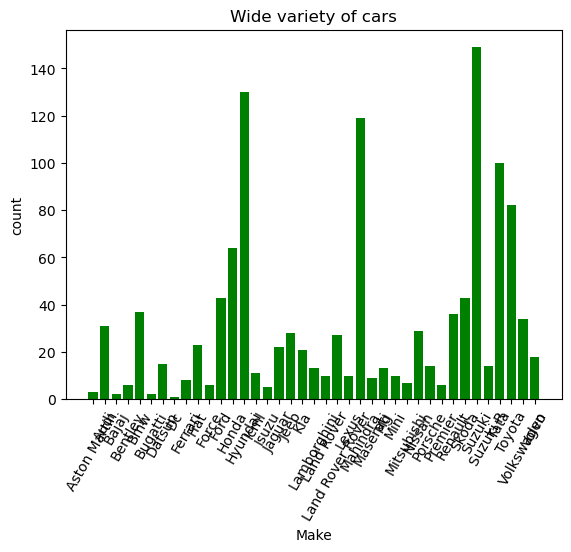

In [11]:
plt.bar(x=x.index,height=x.values,color='g')
plt.xticks(rotation=60)
plt.title('Wide variety of cars')
plt.xlabel('Make')
plt.ylabel('count')

# task 1(subtask)

In [41]:
x=df.groupby('Make')[['Displacement','Fuel_Tank_Capacity_litre','Highway_Mileage_km_litre','City_Mileage_km_litre','Minimum_Turning_Radius']].agg(['mean','median','std'])
x['disp_cv']=x['Displacement',  'std']/x['Displacement',  'mean']*100
x['fuel_cv']=x['Fuel_Tank_Capacity_litre',  'std']/x['Fuel_Tank_Capacity_litre', 'mean' ]*100
x['city_cv']=x['City_Mileage_km_litre',  'std']/x['City_Mileage_km_litre',  'mean']*100
x['high_cv']=x['Highway_Mileage_km_litre',  'std']/x['Highway_Mileage_km_litre',  'mean']*100
x['mini_cv']=x['Minimum_Turning_Radius',  'std']/x['Minimum_Turning_Radius',  'mean']*100
x.reset_index()


Make Displacement                       \
                             mean  median          std   
0       Aston Martin  5038.333333  5198.0   986.241519   
1               Audi  2256.354839  1984.0   836.304352   
2              Bajaj   216.000000   216.0     0.000000   
3            Bentley  5447.833333  5974.0  1164.710164   
4                Bmw  2707.918919  2979.0   924.567237   
5            Bugatti  7993.000000  7993.0     0.000000   
6             Datsun  1065.066667  1198.0   179.470836   
7                 Dc  2000.000000  2000.0          NaN   
8            Ferrari  4589.500000  3902.0  1125.891647   
9               Fiat  1269.391304  1248.0    65.088568   
10             Force  2447.000000  2596.0   230.829807   
11              Ford  1551.325581  1498.0   635.526618   
12             Honda  1444.875000  1498.0   192.049803   
13           Hyundai  1350.558140  1197.0   271.290864   
14              Icml  1994.000000  1994.0     0.000000   
15             Isuzu  2578.800000  2499.0   455.346242   
16            Jaguar  2679.545455  1999.0  1171.060030   
17              Jeep  2102.357143  1956.0   991.904872   
18               Kia  1635.380952  1493.0   327.485950   
19       Lamborghini  5409.692308  5204.0   703.121064   
20        Land Rover  2795.000000  2993.0   419.529896   
21  Land Rover Rover  3199.703704  2993.0  1183.611092   
22             Lexus  3491.600000  3456.0   990.103047   
23          Mahindra  1719.632479  1497.0   534.771085   
24          Maserati  3363.888889  2987.0   752.408872   
25                Mg  1681.818182  1500.0   252.262490   
26              Mini  1897.600000  1998.0   211.661785   
27        Mitsubishi  2563.571429  2477.0   284.005785   
28            Nissan  1507.379310  1461.0   454.160247   
29           Porsche  3062.928571  2995.0   733.485616   
30           Premier  1343.500000  1368.5   161.722911   
31           Renault  1238.583333  1461.0   269.404568   
32             Skoda  1720.581395  1798.0   207.255333   
33            Suzuki  1171.731544  1197.0   188.540147   
34          Suzuki R  1083.285714   998.0   102.196966   
35              Tata  1393.319149  1199.0   401.589509   
36            Toyota  1803.292683  1496.0   641.799947   
37        Volkswagen  1466.294118  1498.0   310.309282   
38             Volvo  1975.555556  1969.0   138.270078   

   Fuel_Tank_Capacity_litre                   Highway_Mileage_km_litre  \
                       mean median        std                     mean   
0                 81.166667   80.0   8.808140                10.450000   
1                 65.633333   64.0  10.463346                12.942857   
2                       NaN    NaN        NaN                      NaN   
3                 88.333333   90.0   2.581989                 7.840000   
4                 64.794118   67.0  12.904731                15.835000   
5                       NaN    NaN        NaN                      NaN   
6                 32.200000   35.0   3.549648                24.000000   
7                 60.000000   60.0        NaN                10.000000   
8                 86.750000   88.5   5.922114                 6.900000   
9                 45.000000   45.0   0.000000                18.409091   
10                63.000000   63.0   0.000000                17.000000   
11                47.323256   42.0  10.599547                12.287500   
12                40.343750   40.0   5.685456                19.310526   
13                45.248000   45.0   7.375478                18.294146   
14                50.000000   50.0   0.000000                11.120000   
15                76.000000   76.0   0.000000                11.700000   
16                68.380952   66.0   9.265399                14.447778   
17                65.678571   60.0  12.488672                 8.400000   
18                57.500000   60.0   4.472136                      NaN   
19                88.750000   90.0   4.330127                 6.266667   
20       

In [42]:
x

Displacement                      Fuel_Tank_Capacity_litre  \
                         mean  median          std                     mean   
Make                                                                          
Aston Martin      5038.333333  5198.0   986.241519                81.166667   
Audi              2256.354839  1984.0   836.304352                65.633333   
Bajaj              216.000000   216.0     0.000000                      NaN   
Bentley           5447.833333  5974.0  1164.710164                88.333333   
Bmw               2707.918919  2979.0   924.567237                64.794118   
Bugatti           7993.000000  7993.0     0.000000                      NaN   
Datsun            1065.066667  1198.0   179.470836                32.200000   
Dc                2000.000000  2000.0          NaN                60.000000   
Ferrari           4589.500000  3902.0  1125.891647                86.750000   
Fiat              1269.391304  1248.0    65.088568                45.000000   
Force             2447.000000  2596.0   230.829807                63.000000   
Ford              1551.325581  1498.0   635.526618                47.323256   
Honda             1444.875000  1498.0   192.049803                40.343750   
Hyundai           1350.558140  1197.0   271.290864                45.248000   
Icml              1994.000000  1994.0     0.000000                50.000000   
Isuzu             2578.800000  2499.0   455.346242                76.000000   
Jaguar            2679.545455  1999.0  1171.060030                68.380952   
Jeep              2102.357143  1956.0   991.904872                65.678571   
Kia               1635.380952  1493.0   327.485950                57.500000   
Lamborghini       5409.692308  5204.0   703.121064                88.750000   
Land Rover        2795.000000  2993.0   419.529896                83.600000   
Land Rover Rover  3199.703704  2993.0  1183.611092                90.000000   
Lexus             3491.600000  3456.0   990.103047                76.777778   
Mahindra          1719.632479  1497.0   534.771085                53.955752   
Maserati          3363.888889  2987.0   752.408872                75.666667   
Mg                1681.818182  1500.0   252.262490                      NaN   
Mini              1897.600000  1998.0   211.661785                45.333333   
Mitsubishi        2563.571429  2477.0   284.005785                71.142857   
Nissan            1507.379310  1461.0   454.160247                46.482759   
Porsche           3062.928571  2995.0   733.485616                74.357143   
Premier           1343.500000  1368.5   161.722911                46.000000   
Renault           1238.583333  1461.0   269.404568                41.555556   
Skoda             1720.581395  1798.0   207.255333                56.860465   
Suzuki            1171.731544  1197.0   188.540147                38.261745   
Suzuki R          1083.285714   998.0   102.196966                32.000000   
Tata              1393.319149  1199.0   401.589509                42.200000   
Toyota            1803.292683  1496.0   641.799947                50.512195   
Volkswagen        1466.294118  1498.0   310.309282                51.294118   
Volvo             1975.555556  1969.0   138.270078                63.700000   

                                   Highway_Mileage_km_litre                    \
                 median        std                     mean  median       std   
Make                                                                            
Aston Martin       80.0   8.808140                10.450000  10.450  3.464823   
Audi               64.0  10.463346                12.942857  12.600  3.947513   
Bajaj               NaN        NaN                      NaN     NaN       NaN   
Bentley            90.0   2.581989                 7.840000   8.600  3.888830   
Bmw                67.0  12.904731                15.835000  16.460  4.452292   
Bugatti             NaN        NaN                

<AxesSubplot:xlabel='Displacement', ylabel='Count'>

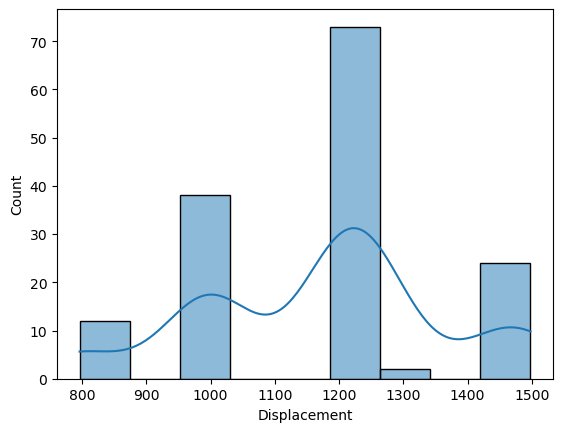

In [47]:
sb.histplot(df[df['Make']=='Suzuki']['Displacement'],kde=True)

<AxesSubplot:xlabel='Displacement', ylabel='Count'>

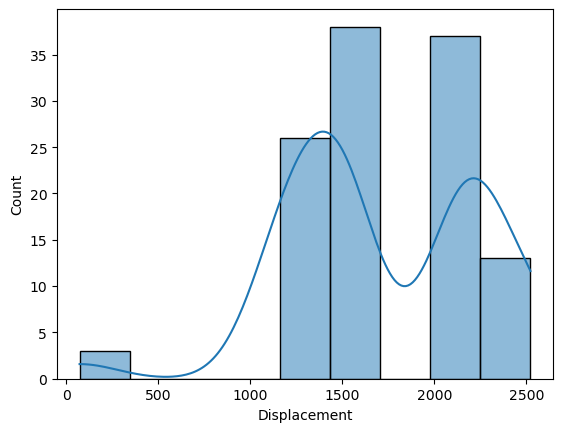

In [49]:
sb.histplot(df[df['Make']=='Mahindra']['Displacement'],kde=True)

<AxesSubplot:xlabel='Displacement', ylabel='Count'>

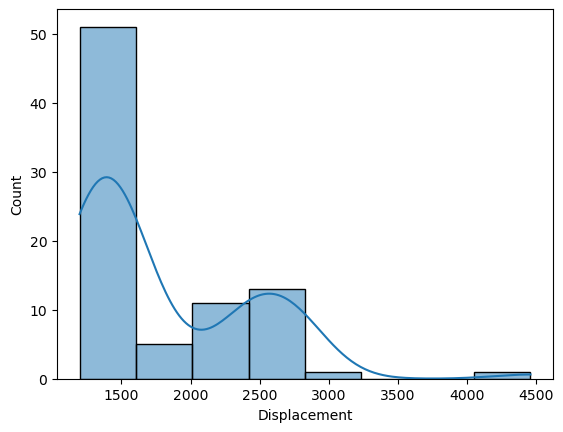

In [50]:
sb.histplot(df[df['Make']=='Toyota']['Displacement'],kde=True)

In [ ]:
# conclusion :- mahindra diplacement is more evenly distributed as compared to others

# task 2

In [52]:
y=df[['Make','Model','Displacement','Cylinders','Length_mm','Width_mm','City_Mileage_km_litre','Highway_Mileage_km_litre']]
y

,Make,Model,Displacement,Cylinders,Length_mm,Width_mm,City_Mileage_km_litre,Highway_Mileage_km_litre
0,Tata,Nano Genx,624.0,2.0,3164.0,1750.0,23.60,NaN
1,Tata,Nano Genx,624.0,2.0,3164.0,1750.0,23.60,NaN
2,Tata,Nano Genx,624.0,2.0,3164.0,1750.0,NaN,NaN
3,Tata,Nano Genx,624.0,2.0,3164.0,1750.0,23.60,NaN
4,Tata,Nano Genx,624.0,2.0,3164.0,1750.0,23.60,NaN
...,...,...,...,...,...,...,...,...
1271,Honda,City,1498.0,4.0,4440.0,1695.0,22.60,25.10
1272,Honda,City,1498.0,4.0,4440.0,1695.0,22.60,25.10
1273,Honda,City,1497.0,4.0,4440.0,1695.0,18.00,18.00
1274,Honda,City,1497.0,4.0,4440.0,1695.0,14.30,16.40


In [53]:
y.dropna(inplace=True)

C:\Users\mail4\AppData\Local\Temp\ipykernel_10764\455453432.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.dropna(inplace=True)


In [54]:
y['overall_mileage']=(y['City_Mileage_km_litre']+y['Highway_Mileage_km_litre'])/2
y.head(1)

C:\Users\mail4\AppData\Local\Temp\ipykernel_10764\1983703343.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['overall_mileage']=(y['City_Mileage_km_litre']+y['Highway_Mileage_km_litre'])/2


,Make,Model,Displacement,Cylinders,Length_mm,Width_mm,City_Mileage_km_litre,Highway_Mileage_km_litre,overall_mileage
6,Datsun,Redi-Go,799.0,3.0,3429.0,1560.0,21.38,24.0,22.69


In [55]:
y_piv=pd.pivot_table(y,index='Make',values=(['Displacement','Cylinders','Length_mm','Width_mm','overall_mileage']),aggfunc='mean')
y_piv.head()

,Cylinders,Displacement,Length_mm,Width_mm,overall_mileage
Make,,,,,
Aston Martin,10.000000,4958.500000,4742.000000,2041.000000,8.750000
Audi,6.285714,3147.714286,4788.571429,1919.428571,11.992857
Bentley,10.400000,5738.200000,5224.200000,2169.200000,6.430000
Bmw,5.142857,2592.357143,4749.142857,1976.000000,14.641429
Datsun,3.000000,799.000000,3429.000000,1560.000000,22.690000


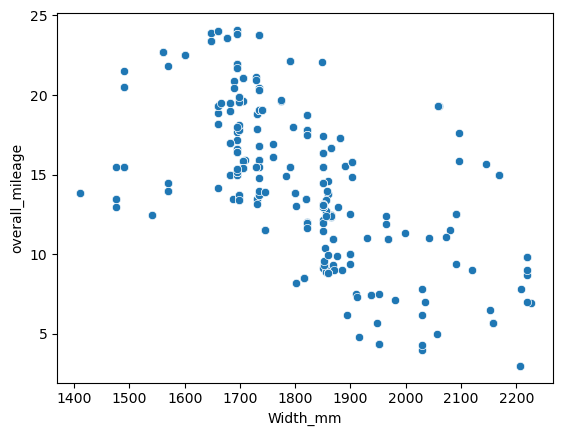

In [57]:
sb.scatterplot(x="Width_mm", y="overall_mileage", data=y)
plt.show()

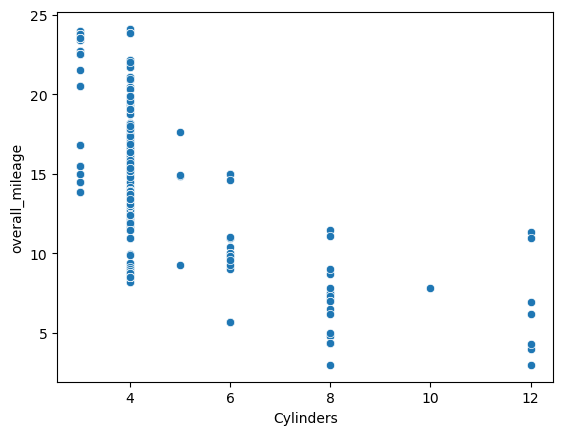

In [60]:
sb.scatterplot(x="Cylinders", y="overall_mileage", data=y)
plt.show()

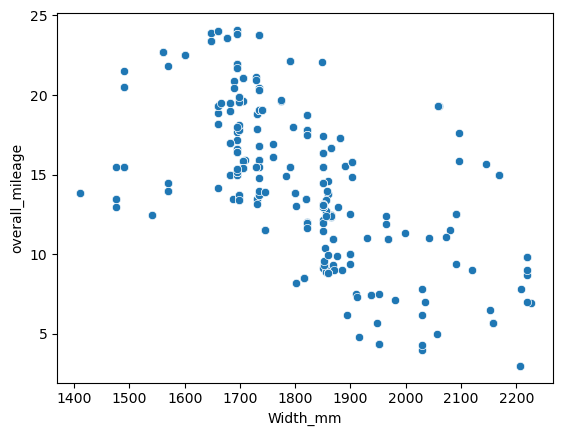

In [61]:
sb.scatterplot(x="Width_mm", y="overall_mileage", data=y)
plt.show()

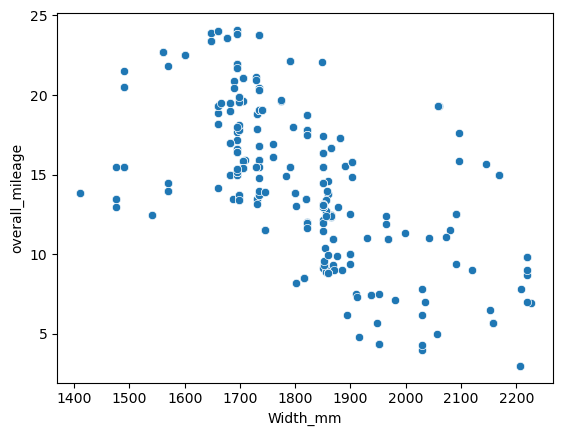

In [62]:
sb.scatterplot(x="Width_mm", y="overall_mileage", data=y)
plt.show()

In [65]:
disp=y['Displacement'].corr(y['overall_mileage'])
cyl=y['Cylinders'].corr(y['overall_mileage'])
width=y['Width_mm'].corr(y['overall_mileage'])
length=y['Length_mm'].corr(y['overall_mileage'])


In [66]:
print(f'the correlation between displacement and overall_mileage is: {disp}')
print(f'the correlation between Cylinders and overall_mileage is: {cyl}')
print(f'the correlation between Width_mm and overall_mileage is: {width}')
print(f'the correlation between Length_mm and overall_mileage is: {length}')

the correlation between displacement and overall_mileage is: -0.7268073973696746
the correlation between Cylinders and overall_mileage is: -0.6365879934341535
the correlation between Width_mm and overall_mileage is: -0.600963527049559
the correlation between Length_mm and overall_mileage is: -0.6802354888565423


In [ ]:
# conclusion:- as we can see in the above correlation graphs and the correlation coeffecient the correlation between displacement,no of cylinder, width of vehicle ,length of vehicle VS overall mileage is strong negative correlation